<a href="https://colab.research.google.com/github/RafsanJany-44/ARC_Machine2/blob/main/WOMAC_Total_Regression_Version321.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install smogn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import numpy as np
import pandas as pd
import smogn
#dataset=pd.read_csv("/content/drive/MyDrive/Iqram Sir/KOA_EMG_WOMAC__2022.08.29_Final_W-tempo-spatial.csv")
d=pd.read_csv("/content/drive/MyDrive/Iqram Sir/KOA_EMG_WOMAC__2022.08.31_Final_Original.csv")

dataset = smogn.smoter(
    
    data = d, 
    y = "WOMAC_total"
)

r_index: 100%|##########| 2/2 [00:00<00:00,  4.15it/s]


In [5]:
dataset.head(10)

,Patient ID,Data Type,Bone-Attribution,WOMAC_Pain,WOMAC_Pain Grade,WOMAC_Stiffness,WOMAC_Stiffness Grade,WOMAC_Physical function,WOMAC_MHhysical function Grade,WOMAC_total,...,TA-G-100,Stance_CCI_TA-RF,Stance_CCI_G-MH,Stance_CCI_TA-G,Swing_CCI_TA-RF,Swing_CCI_G-MH,Swing_CCI_TA-G,swing/stance_cci(TA_RF),swing/stance_cci(G-MH),swing/stance_CCI(TA-G)
0,13490,Testing,O,12,Moderate,1,Mild,51,Severe,66,...,80.080600,23.714214,195.879405,23.004550,117.750717,82.182115,116.889299,5.447944,0.401610,5.650180
1,14071,Testing,O,10,Moderate,6,Mild,49,Severe,66,...,45.955399,28.657786,302.585929,27.348073,65.277088,341.553158,80.082589,2.462042,1.117771,2.903544
2,14064,Testing,O,9,Moderate,5,Mild,49,Severe,66,...,39.155617,138.104427,159.963024,123.783568,86.704138,73.662338,118.927347,0.643192,0.455010,0.938581
3,14463,Testing,O,14,Moderate,5,Mild,46,Severe,66,...,82.221631,100.616082,72.845600,83.156595,110.654905,53.440038,169.776741,1.106497,0.735839,1.931125
4,14460,Testing,O,15,Moderate,5,Mild,46,Severe,66,...,871.652730,247.053137,75.419781,478.974022,325.417419,13.109512,807.426989,1.347623,0.220784,1.699184
5,13248,Testing,O,9,Moderate,5,Mild,52,Severe,68,...,98.972562,95.148632,139.021021,95.991607,224.614593,29.298810,221.900296,2.323623,0.183988,2.321121
6,13350,Testing,O,14,Moderate,6,Mild,50,Severe,69,...,102.802363,126.242925,133.704187,128.446044,109.966688,109.994904,125.816241,0.882192,0.830351,0.998033
7,13355,Testing,O,13,Moderate,6,Mild,50,Severe,70,...,61.167784,287.785020,104.584531,132.258914,157.303137,75.986804,179.723614,0.518769,0.708553,1.364856
8,13524,Testing,O,14,Moderate,6,Mild,49,Severe,69,...,196.259093,81.502558,63.690699,158.983670,112.536916,22.367839,331.063099,1.376381,0.368928,2.033562
9,14146,Testing,O,12,Moderate,5,Mild,51,Severe,69,...,257.938342,221.805798,101.838821,255.572029,282.030150,33.812695,404.823080,1.252290,0.338323,1.606359


In [6]:
dataset.shape

(151, 812)

In [7]:
X = dataset.iloc[:,17:]
y = dataset.iloc[:, 9]

In [8]:
'''
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
'''

'\nfrom sklearn.model_selection import train_test_split\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)\n'

In [9]:
from sklearn.feature_selection import SelectKBest
bestfeatures = SelectKBest(k=10)
fit = bestfeatures.fit(X,y)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [21 22 23 24] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [10]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [11]:
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']

In [12]:
number_of_feat=int(input("Number Of Best Features: "))

Number Of Best Features: 20


In [13]:
imp=featureScores.nlargest(number_of_feat,'Score')
print(imp)

              Specs      Score
777         TA-G-92  13.738405
776         TA-G-91  13.509876
778         TA-G-93  13.118408
779         TA-G-94  12.216673
775         TA-G-90  11.616445
784         TA-G-99  11.284778
785        TA-G-100  11.160011
780         TA-G-95  10.129515
783         TA-G-98   9.929360
782         TA-G-97   9.065626
774         TA-G-89   8.971900
781         TA-G-96   8.895064
773         TA-G-88   6.839514
791  Swing_CCI_TA-G   6.561777
772         TA-G-87   5.283166
759         TA-G-74   5.148562
758         TA-G-73   4.853361
760         TA-G-75   4.650424
685          TA-G-0   4.522051
686          TA-G-1   4.094921


In [14]:
list_of_feat=[]

for i in range(number_of_feat):
  list_of_feat.append(imp.iloc[:,0:1].values[i][0])

In [15]:
X_new = dataset[list_of_feat]
y_new = dataset.iloc[:, 9]

In [16]:
X_train=X_new.iloc[:120,:]  
X_test=X_new.iloc[120:,:]
y_train=y_new.iloc[:120]
y_test=y_new.iloc[120:]

In [17]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)


#Taining Ploting and Result

In [18]:
y_pred_train = lin_reg.predict(X_train)

print(y_pred.shape)
from sklearn.metrics import r2_score,mean_squared_error
print("Training r2: ",r2_score(y_train,y_pred_train))


r_sq = lin_reg.score(X_new, y_new)
print("Training r_sq: ",r_sq)





(31,)
Training r2:  0.23500305303976565
Training r_sq:  0.02483959046072115


In [19]:
r_sq_train = lin_reg.score(X_train, y_pred_train)
print(r_sq_train)

1.0


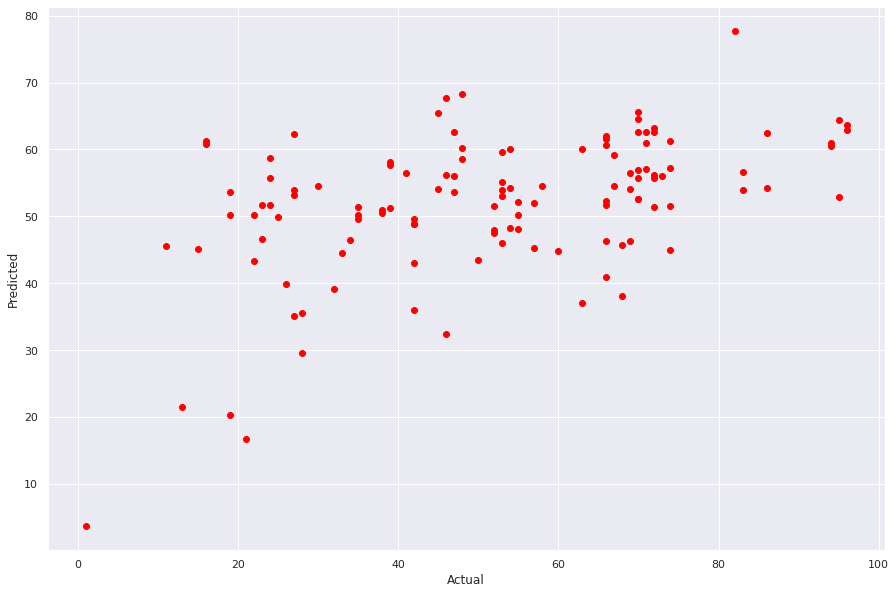

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.scatter(y_train, y_pred_train, color = "red")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()


In [21]:
pred_y_df=pd.DataFrame(
    {
        "Actual Value":y_train,
        "Predicted Value":y_pred_train,
        "Difference":y_train-y_pred_train
    }
)

pred_y_df

,Actual Value,Predicted Value,Difference
0,66,51.752362,14.247638
1,66,46.248628,19.751372
2,66,61.983257,4.016743
3,66,40.894838,25.105162
4,66,60.614626,5.385374
...,...,...,...
136,47,53.624656,-6.624656
137,48,60.279159,-12.279159
139,52,47.560393,4.439607
140,53,59.698921,-6.698921


In [22]:
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_train, y_pred_train))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_train, y_pred_train))



Mean squared error: 361.90
Coefficient of determination: 0.24


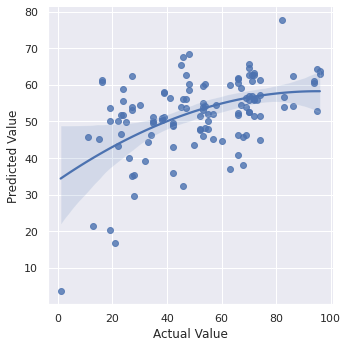

In [23]:
import seaborn as sns

sns.set(rc={'figure.figsize':(12,10)})
scatter_poly2 = sns.lmplot(
    data = pred_y_df, 
    x = "Actual Value",
    y = "Predicted Value",
    order = 2
)



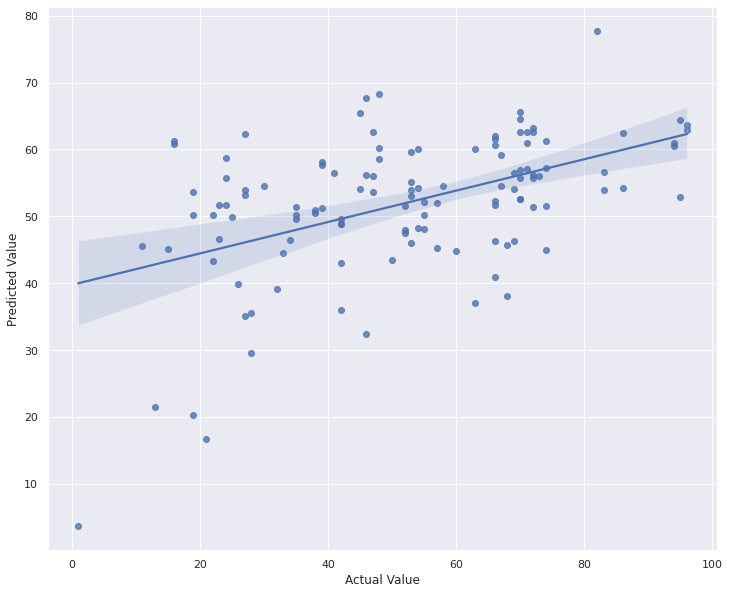

In [24]:
sns.regplot(x="Actual Value", y="Predicted Value", data=pred_y_df);




#Testing Ploting and Result

In [25]:
y_pred_test = lin_reg.predict(X_test)


from sklearn.metrics import r2_score,mean_squared_error
print("Testing r2: ",r2_score(y_test,y_pred_test))

r_sq = lin_reg.score(X_new, y_new)
print("R_sq: ",r_sq)

Testing r2:  -1.386907556947346
R_sq:  0.02483959046072115


In [26]:
r_sq_test = lin_reg.score(X_test, y_pred_test)
print(r_sq_test)

1.0


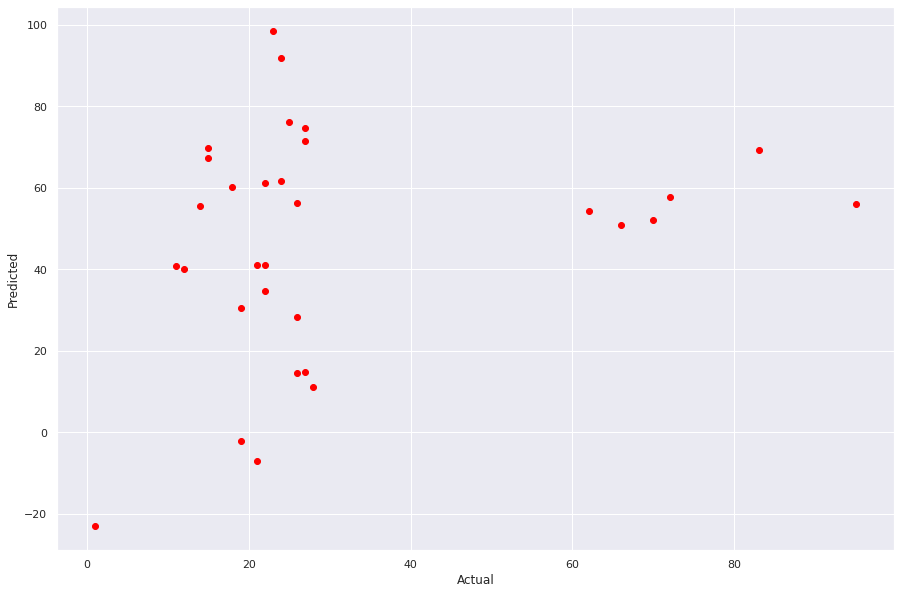

In [27]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.scatter(y_test, y_pred_test, color = "red")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

In [28]:
pred_y_df=pd.DataFrame(
    {
        "Actual Value":y_test,
        "Predicted Value":y_pred_test,
        "Difference":y_test-y_pred_test
    }
)

pred_y_df


,Actual Value,Predicted Value,Difference
144,62,54.370430,7.629570
145,66,50.883585,15.116415
146,70,52.086018,17.913982
147,72,57.835892,14.164108
148,83,69.354275,13.645725
149,95,56.040820,38.959180
0,1,-22.947555,23.947555
1,11,40.865691,-29.865691
2,12,40.131175,-28.131175
3,14,55.574726,-41.574726


In [29]:

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred_test))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred_test))


Mean squared error: 1222.70
Coefficient of determination: -1.39


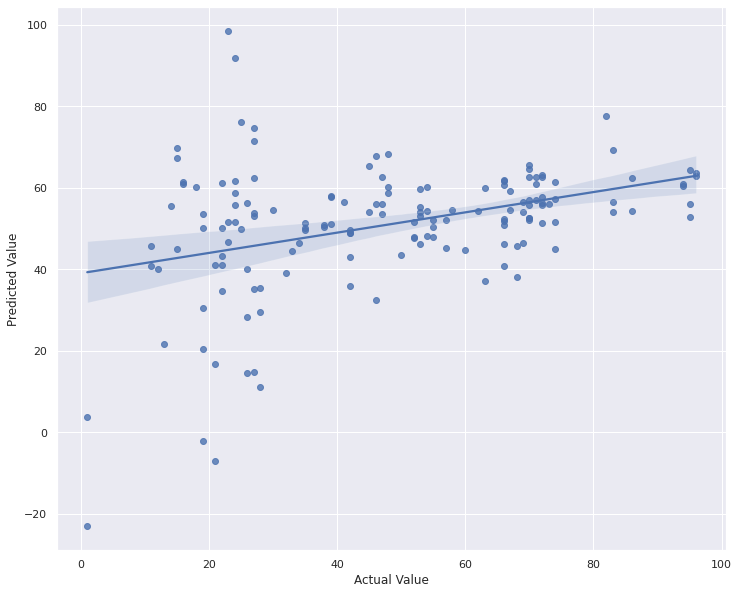

In [42]:
import seaborn as sns

sns.set(rc={'figure.figsize':(12,10)})
scatter_poly2 = sns.lmplot(
    data = pred_y_df, 
    x = "Actual Value",
    y = "Predicted Value",
    order = 2
)



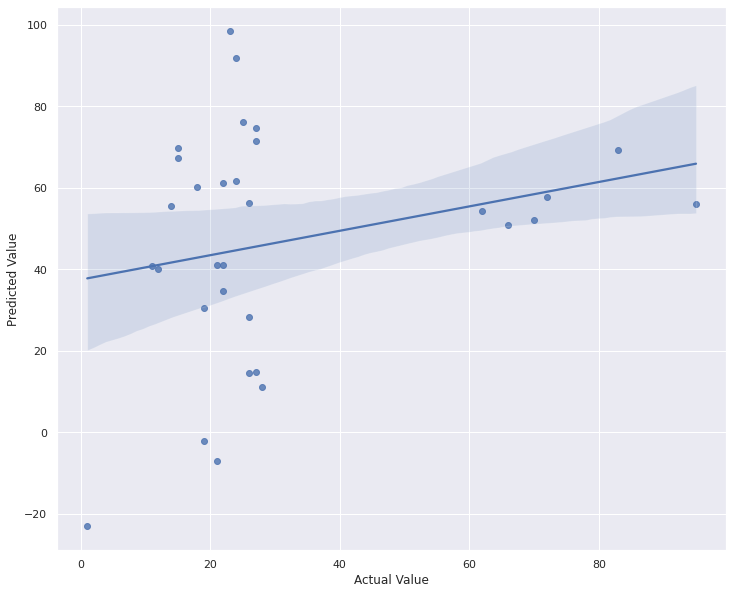

In [31]:
sns.regplot(x="Actual Value", y="Predicted Value", data=pred_y_df);

#Over All dataset Ploting and Results

In [32]:
y_pred_new = lin_reg.predict(X_new)


from sklearn.metrics import r2_score,mean_squared_error
print("Testing r2: ",r2_score(y_new,y_pred_new))

r_sq = lin_reg.score(X_new, y_new)
print("R_sq: ",r_sq)

Testing r2:  0.02483959046072115
R_sq:  0.02483959046072115


In [33]:
r_sq_test = lin_reg.score(X_new, y_pred_new)
print(r_sq_test)

1.0


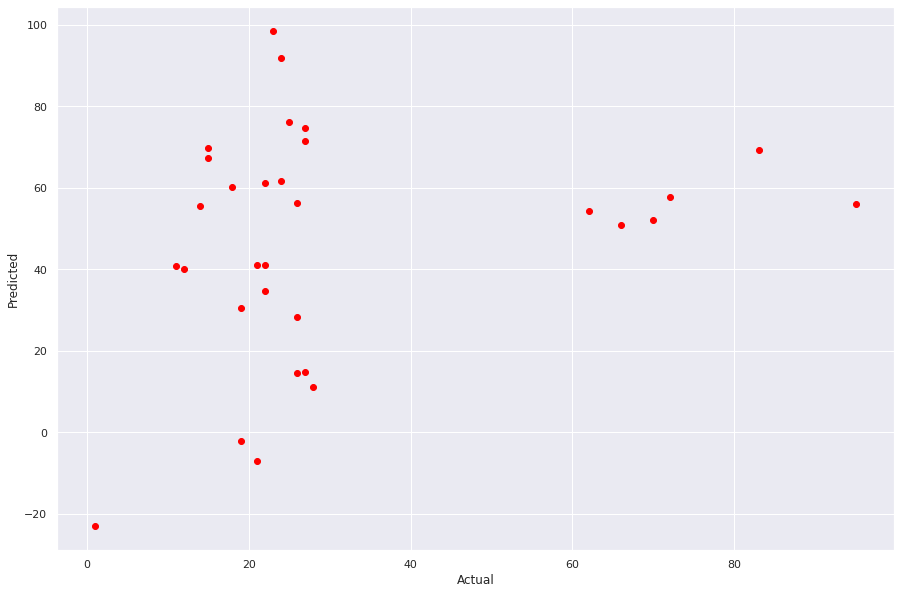

In [34]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.scatter(y_test, y_pred_test, color = "red")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

In [35]:
pred_y_df=pd.DataFrame(
    {
        "Actual Value":y_new,
        "Predicted Value":y_pred_new,
        "Difference":y_new-y_pred_new
    }
)

pred_y_df


,Actual Value,Predicted Value,Difference
0,66,51.752362,14.247638
1,66,46.248628,19.751372
2,66,61.983257,4.016743
3,66,40.894838,25.105162
4,66,60.614626,5.385374
...,...,...,...
20,27,71.466728,-44.466728
21,26,28.363290,-2.363290
22,26,56.381448,-30.381448
23,28,11.008916,16.991084


In [36]:

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_new, y_pred_new))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_new, y_pred_new))


Mean squared error: 538.62
Coefficient of determination: 0.02


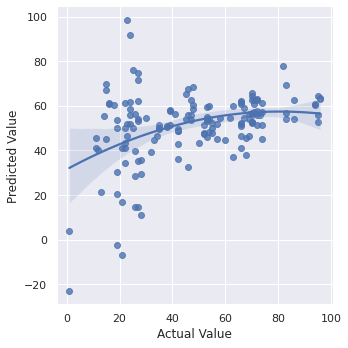

In [37]:
import seaborn as sns

sns.set(rc={'figure.figsize':(12,10)})
scatter_poly2 = sns.lmplot(
    data = pred_y_df, 
    x = "Actual Value",
    y = "Predicted Value",
    order = 2
)

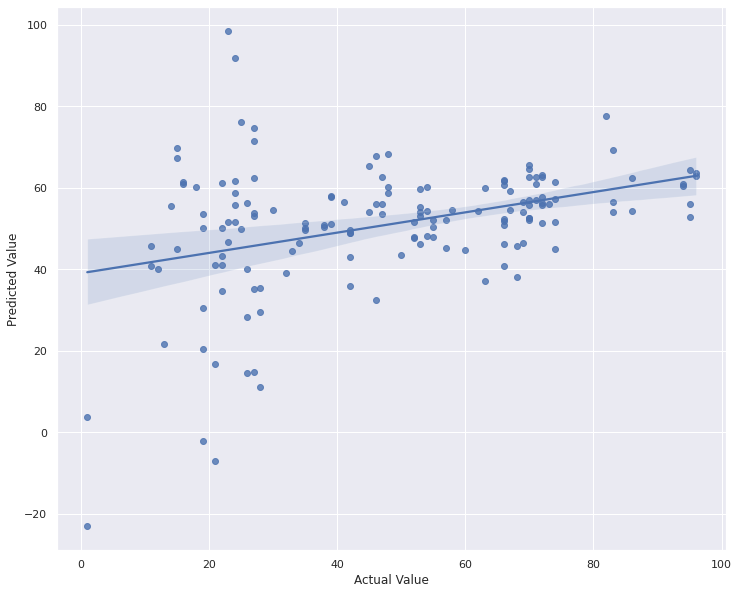

In [38]:
sns.regplot(x="Actual Value", y="Predicted Value", data=pred_y_df);

#Support Vector Regression (SVR) using linear and non-linear kernels

In [44]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

regr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
regr.fit(X_train, y_train)

y_pred = lin_reg.predict(X_test)

In [47]:
from sklearn.metrics import r2_score,mean_squared_error
print("Testing r2: ",r2_score(y_test,y_pred))

r_sq = lin_reg.score(X_new, y_new)
print("R_sq: ",r_sq)

Testing r2:  -1.386907556947346
R_sq:  0.02483959046072115


#RandomForestRegressor

In [55]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X_train, y_train)

y_pred_1 = regr.predict(X_test)

In [60]:
from sklearn.metrics import r2_score,mean_squared_error
print("Testing r2: ",r2_score(y_test,y_pred_1))

r_sq = regr.score(X_new, y_new)
print("R_sq: ",r_sq)

Testing r2:  -0.2894821260439071
R_sq:  0.2988872132729654


#Ridge

[DOC](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)

In [57]:
from sklearn.linear_model import Ridge
clf = Ridge(alpha=1.0)
clf.fit(X_train, y_train)

y_pred_2 = clf.predict(X_test)

In [59]:
from sklearn.metrics import r2_score,mean_squared_error
print("Testing r2: ",r2_score(y_test,y_pred_2))

r_sq = clf.score(X_new, y_new)
print("R_sq: ",r_sq)

Testing r2:  -1.383458653534377
R_sq:  0.025496204845425474


#Lasso

[DOC](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html)

In [65]:
from sklearn import linear_model
clf = linear_model.Lasso(alpha=0.1)
clf.fit(X_train, y_train)

y_pred_2 = clf.predict(X_test)

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.271e+04, tolerance: 5.677e+00


In [66]:
from sklearn.metrics import r2_score,mean_squared_error
print("Testing r2: ",r2_score(y_test,y_pred_2))

r_sq = clf.score(X_new, y_new)
print("R_sq: ",r_sq)

Testing r2:  -0.5880170326831076
R_sq:  0.14950617214498996


#Polynomial

In [67]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(2)
poly.fit_transform(X_train)



poly = PolynomialFeatures(interaction_only=True)
poly.fit_transform(X_train)





array([[1.00000000e+00, 4.87236473e+01, 4.40597381e+01, ...,
        5.01472860e+03, 5.44543235e+03, 2.95508782e+03],
       [1.00000000e+00, 1.96406910e+01, 1.60946940e+01, ...,
        7.40950286e+03, 7.74865531e+03, 1.75604851e+03],
       [1.00000000e+00, 2.40758181e+01, 1.53807100e+01, ...,
        1.15864860e+04, 1.63699977e+04, 3.60564694e+03],
       ...,
       [1.00000000e+00, 7.34861370e+01, 7.89234307e+01, ...,
        2.16532911e+04, 2.38774859e+04, 1.38874765e+04],
       [1.00000000e+00, 1.07432646e+02, 9.49762529e+01, ...,
        2.03905561e+04, 3.05000866e+04, 3.36762840e+03],
       [1.00000000e+00, 1.02145827e+02, 1.18722432e+02, ...,
        1.57127560e+05, 1.76437170e+05, 3.45410980e+05]])

**SHAP**

In [39]:
!pip install shap
import shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 14.5 MB/s 


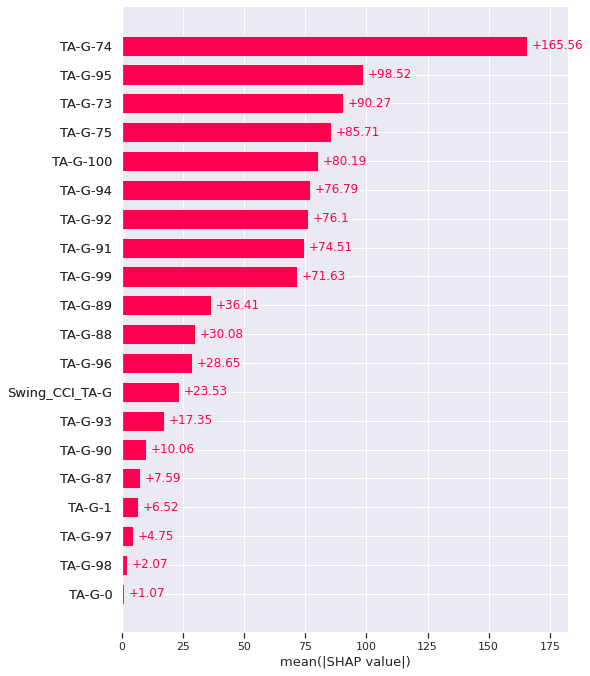

In [40]:
import pandas as pd
import shap
import sklearn
model = sklearn.linear_model.LinearRegression()
model.fit(X_train, y_train)

# compute the SHAP values for the linear model
explainer = shap.Explainer(model.predict, X_train)
shap_values = explainer (X_train)
shap.plots.bar(shap_values,max_display=20)